In [1]:
#| eval: false
#| echo: true
# パッケージのインストール
install.packages(c("palmerpenguins"))

In [2]:
#| label: パッケージの読み込み
library(tidyverse)
library(palmerpenguins) # ペンギンデータを利用

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
#| label: 動物データの読み込み
df_animal <-
  readr::read_csv("https://raw.githubusercontent.com/uribo/tokupon_ds/main/data-raw/tokushima_zoo_animals22.csv", col_types = "ccdd")

一般に、データ分析で扱うデータの件数は数百から数十万件と膨大です。このような大量のデータを全て目視で確認することは困難です。そのため、データの特徴を理解し、全体像を把握することが重要になります。手法としては、平均値や中央値などの**代表値**によるデータの集約、分散、標準偏差による**ばらつき**を用いた分布の推定などがあります。また、グラフ等を用いたデータ可視化もデータの特徴を把握するための手法の一つです。


In [4]:
# 数値の羅列から特徴を読み取るのは困難
head(penguins$bill_length_mm, 100)

# 平均値と標準偏差によってデータの特徴を把握する
mean(penguins$bill_length_mm, na.rm = TRUE)
sd(penguins$bill_length_mm, na.rm = TRUE)

[1] 39.1 39.5 40.3   NA 36.7 39.3 38.9 39.2 34.1 42.0 37.8 37.8 41.1 38.6 34.6
 [16] 36.6 38.7 42.5 34.4 46.0 37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 40.5
 [31] 39.5 37.2 39.5 40.9 36.4 39.2 38.8 42.2 37.6 39.8 36.5 40.8 36.0 44.1 37.0
 [46] 39.6 41.1 37.5 36.0 42.3 39.6 40.1 35.0 42.0 34.5 41.4 39.0 40.6 36.5 37.6
 [61] 35.7 41.3 37.6 41.1 36.4 41.6 35.5 41.1 35.9 41.8 33.5 39.7 39.6 45.8 35.5
 [76] 42.8 40.9 37.2 36.2 42.1 34.6 42.9 36.7 35.1 37.3 41.3 36.3 36.9 38.3 38.9
 [91] 35.7 41.1 34.0 39.6 36.2 40.8 38.1 40.3 33.1 43.2

[1] 43.92193

[1] 5.459584

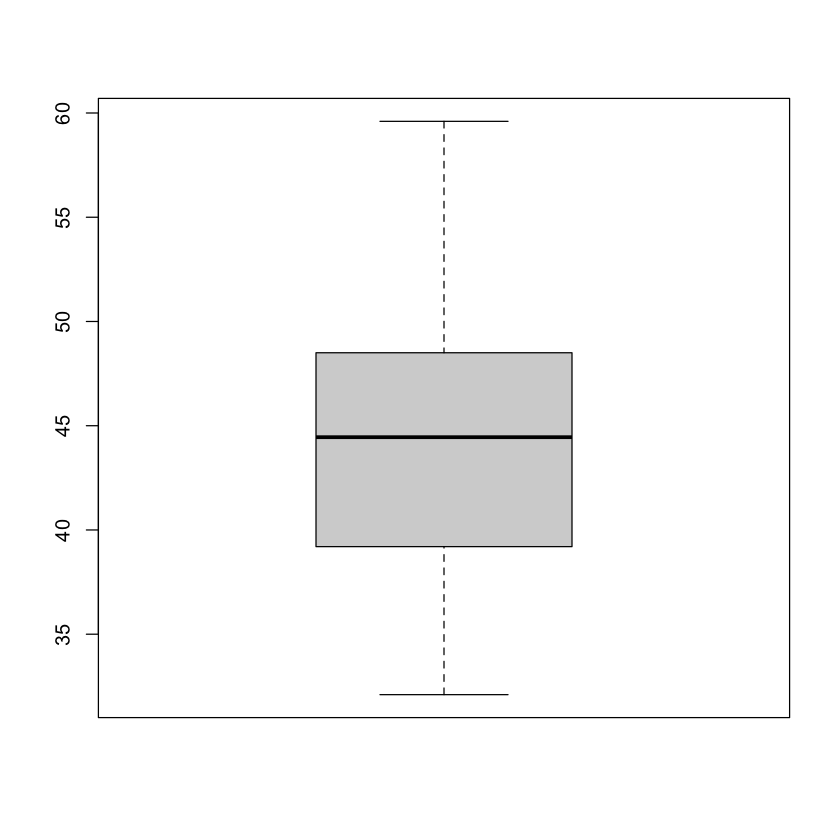

In [5]:
# 箱ひげ図を作成し、データの特徴を把握する
# 箱ひげ図はデータの中央値、四分位範囲、外れ値を示す
# このデータに外れ値は存在せず、表示されない
boxplot(penguins$bill_length_mm, na.rm = TRUE)

代表値やばらつきによって示される数値を**要約統計量**と呼びます。要約統計量は、データの特徴を把握するための方法です。数値を用いてデータの特徴を統計的な指標として表現します。

## データの代表値

データの傾向や中心的な位置を表す値を**代表値**と呼びます。代表値には、平均値、最頻値、中央値などの種類があります。データの代表値を求めるには、`summary()`関数を用います。対象の数値ベクトルに対して実行してみましょう。


In [6]:
# 数値データのベクトルに対してsummary()関数を実行
summary(df_animal$body_length_cm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.20   63.62   82.50  102.87  133.00  250.00       4 

`summary()`関数はベクトルだけでなくデータフレームに対しても機能します。


In [7]:
# データフレームに対してsummary()関数を実行すると、各列についての要約統計量が表示される
# 文字列の変数は最頻値のみが表示される
summary(df_animal)

    taxon               name           body_length_cm     weight_kg     
 Length:22          Length:22          Min.   :  1.20   Min.   :  0.90  
 Class :character   Class :character   1st Qu.: 63.62   1st Qu.:  5.85  
 Mode  :character   Mode  :character   Median : 82.50   Median : 12.50  
                                       Mean   :102.87   Mean   : 65.81  
                                       3rd Qu.:133.00   3rd Qu.: 69.50  
                                       Max.   :250.00   Max.   :410.00  
                                       NA's   :4        NA's   :2       

### 平均値

データの中心を表す代表値として、平均値が用いられます。平均値は、データの合計値をデータの件数で割った値です。

Rでは`mean()`関数を用いて平均値を求めることができます。ですがまずは愚直に合計値と件数から平均値を計算してみましょう。合計値は`sum()`関数、件数は`length()`関数を用いて求めることができます。


In [8]:
x <- c(1, 10, 5, 3, 7)
sum(x) / length(x)

[1] 5.2

続いて`mean()`関数を用いて平均値を計算してみます。先ほどと同じ結果になることが確認できます。


In [9]:
# mean()関数を用いて平均値を計算
mean(x)

[1] 5.2

平均値はその言葉の通り、データの真ん中あたりを示す代表値です。しかし、「あたり」という点に注意してください。平均値は必ずしもデータの真ん中を示す値ではありません。

また、平均値を扱うときは**外れ値**の影響を受けやすい性質があるを理解しておきましょう。外れ値とはデータに含まれる、極端に大きい・小さい値のことです。

次に示す、動物データの一部の動物の体重について平均値がどのくらいになるか考えてみましょう。


In [10]:
df_animal_subset <- 
  df_animal |> 
  arrange(weight_kg) |> 
  filter(name %in% c("ミーアキャット", "リスザル", "モルモット", "コツメカワウソ", "ホッキョクグマ")) |> 
  select(name, weight_kg)

# 動物データの体重の平均はどのくらい？
df_animal_subset$weight_kg

[1]   0.9   1.1   1.5   5.4 410.0

このデータのサブセットでの体重の平均値は`r mean(df_animal_subset$weight_kg)`です。一方でこの平均よりも小さな動物は5種中4種もいました。そのため、この値をデータの真ん中と見なすと問題があります。この平均値は極端に体重が大きいホッキョクグマの体重に引っ張られていると考えられます。

![平均値は外れ値の影響を受けやすい](https://uribo.github.io/tokupon_ds/images/average_outlier.png)

### 中央値

中央値はデータを小さい順に並べたときに、ちょうど真ん中に位置する値です。データの件数が奇数の場合は、中央値はデータの中央に位置する値です。データの件数が偶数の場合は、中央値はデータの中央に位置する2つの値の平均値です。


In [11]:
# xの数値は大きさの順番になっていないので並び替える
sort(x)

[1]  1  3  5  7 10

In [12]:
sort(x)[3]

[1] 5

中央値は`median()`関数により求めることができます。


In [13]:
median(x)

[1] 5

### 最頻値

最頻値はデータの中で最も頻繁に出現する値のことを言います。最頻値はその性質から、データの中で複数の値となることがあります。また連続値ではなく離散値に対して用いられることが多いです。例えば、動物データの種類について最頻値を求めてみましょう。


In [14]:
table(df_animal$taxon)


  偶蹄類   奇蹄類   霊長類   食肉類 鯨偶蹄類     鳥類   齧歯類 
       1        1        4        7        2        5        2 

`table()`関数はデータの中での値の出現頻度を求める関数です。この関数を用いると、データの中で最も頻繁に出現する値を求めることができます。


In [15]:
# 最も頻繁に出現する分類群の数を求める
max(table(df_animal$taxon))

[1] 7

大量の数値データを扱う際、最頻値が複数になる場合には、データの分布を詳しく調べる必要があります。例えば、最頻値が複数になるデータは分布が多峰性を示している可能性があります。この場合、最頻値以外の、中央値や分散などの指標を併せてデータの特徴を考えることが重要になります。

### 欠損値を含むデータの代表値

多くの代表値は欠損値を含むデータに対して、欠損値を無視して計算する必要があります。つまり、欠損値を含んだ状態では正確な値を計算することができません。

例えば、動物データの体重にはいくらかの欠損値が含まれています。このデータの体重の平均値を次のように求めると欠損値が返却されます。


In [16]:
# df_animal$weight_kg

mean(df_animal$weight_kg)

[1] NA

Rでは、欠損値を無視して計算するための引数`na.rm`が用意されています。


In [17]:
# 欠損値を除外して平均値を計算
mean(df_animal$weight_kg, na.rm = TRUE)

[1] 65.81

### 四分位点

中央値の考え方を拡張したものとして四分位点があります。これはデータを小さい方から並び替えたとき、データ全体を均等な数からなる4つのグループに分ける3つの点（値）のことを指します。

各グループ区切りの値となる点をそれぞれ第1四分位点（25パーセンタイル）、第2四分位点（50パーセンタイル）、第3四分位点（75パーセンタイル）と呼びます。第2四分位点はデータの値を並び替えたときの真ん中となる値、つまり中央値です。また、パーセンタイルというのは値を小さい方から並び替えたときの最後の値の位置を100としたときの四分位点の位置を示す値です。つまり最小値は0パーセンタイル、最大値は100パーセンタイルとなります。

![四分位点のイメージ](https://uribo.github.io/tokupon_ds/images/quantile_explain.png)

データの半分が含まれる第1四分位点から第3四分位点までの範囲のことを四分位範囲と呼びます。 四分位範囲は第3四分位点から第1四分位点の値を引くことで求められます。

ペンギンデータの翼の長さ(flipper_length_mm)について四分位点を確認してみましょう。Rでは`quantile()`関数を使い四分位点を求めます。また、冒頭に示したように`summary()`関数を使うことでも四分位点を確認することが可能です。


In [18]:
quantile(penguins$flipper_length_mm, na.rm = TRUE)

0%  25%  50%  75% 100% 
 172  190  197  213  231

平均値や中央値ではデータの位置を示す値として一つの値しかわからなかったのに対して、四分位点を用いることで、より多くの情報を得ることができるようになりました。この四分位点を利用したデータの視覚的な表現方法として**箱ヒゲ図**があります。

<!-- 箱ヒゲ図の作り方は来週

見方だけ示す
-->

## データのばらつき

平均値や中央値はデータの中心的な位置を示す値として役に立ちますが、データのちらばり具合、すなわちばらつきを示す値としては不十分です。データのばらつきを示す指標として、分散や標準偏差が利用されます。これらの要約統計量を組み合わせて用いることで、データの分布について具体的な説明ができるようになります。

### 範囲

範囲は最も単純にデータのばらつきを表現するのに利用されます。範囲はデータの最小値と最大値から求めます。

Rでは最小値、最大値を求める関数としてそれぞれ`min()`関数、`max()`関数が用意されています。また、最小値・最大値を同時に出力する`range()`関数も利用できます。


In [19]:
# 動物データの体長について最小値・最大値を求める
# bl ... body_lengthの略称として使う
min_bl <- 
  min(df_animal$body_length_cm, na.rm = TRUE)
min_bl

[1] 1.2

In [20]:
max_bl <-
  max(df_animal$body_length_cm, na.rm = TRUE)
max_bl

[1] 250

In [21]:
range(df_animal$body_length_cm, na.rm = TRUE)

[1]   1.2 250.0

最小値と最大値がわかれば、次のその差を求めます。この値がデータのとりうる範囲となります。範囲により区間という意味でのデータのばらつきの程度がわかるようになります。


In [22]:
# 動物データの体長の範囲
max_bl - min_bl

# このやり方でもOK
diff(range(df_animal$body_length_cm, na.rm = TRUE))

[1] 248.8

[1] 248.8

範囲を求める際に使う数値はデータの最小値と最大値でした。そのためいくつかの問題が発生します。まず、最小値と最大値だけを見ているので、他の値については無視することになっています。そのため分布がどうなっているかを具体的に知ることはできません。加えて、最小値・最大値が外れ値となっているある場合に、範囲が過大評価となってしまう恐れがあります。そこで次に、データのすべての値がもつ情報を利用する分散と、分散を利用した標準偏差を求めることにします。

### 分散

分散とは、それぞれのデータが平均値を中心としてどのように散らばっているかを示すものです。分散を求めることで、例えばペンギンの各個体の体長は全般的に均一な値をしているのか、特定の個体が平均値よりも特段高い（あるいは低い）のか、体長が高い個体と低いがバラバラにいるのかがわかるようになります。

分散は次のように求めます。

1. 変数の値の平均値を出す
2. 変数の各値と平均値の差を求める（偏差と呼びます）
3. 偏差を二乗する
4. すべての値に対して1から3の手順を繰り返し、合計する
5. 合計した値をデータの数で割る

各値と平均値の差を求めたあと、その合計を計算すると、どんなデータであっても合計は０になります。平均値より小さい・大きい値との差を求めてその合計を出しているので、差を相殺することになっています。これではばらつきを評価できません。そこで分散を求める際には、その差を2乗し、値を足し合わせます。ここまでの内容を整理すると次のように表現できます。

$$
分散 = \frac{変数の値と平均値の差の2乗の合計}{変数に含まれるデータ数} = \frac{1}{n}\sum_{i=i}^{n}{(x_i - \bar{x})^2}
$$

上記の式は標本分散を求める式となっています。Rにおける分散の算出は`var()`関数で行われますが、ここでの分散は不偏分散と呼ばれるもので データの数から１引いた値で割る点で異なります。 ここまでの内容をおさらいしてみましょう。


In [23]:
# アデリーペンギンの5頭の体重(body_mass_g)に限定して分散を求める
df <- 
  penguins |> 
  filter(species == "Adelie") |> 
  select(body_mass_g) |> 
  filter(!is.na(body_mass_g)) |> 
  slice_head(n = 5)

In [24]:
df <- 
  df |> 
  # 各値について偏差 deviation（平均よりもいくら大きいか小さいか）を求める
  mutate(deviation = body_mass_g - mean(df$body_mass_g, na.rm = TRUE))

df

body_mass_g,deviation
<int>,<dbl>
3750,170
3800,220
3250,-330
3450,-130
3650,70


In [25]:
# 偏差の合計は0になる
sum(df$deviation)

[1] 0

In [26]:
# 偏差の値は正と負の値が混ざる
df$deviation

[1]  170  220 -330 -130   70

In [27]:
# 偏差は2乗することで正の値のみになる
df$deviation^2

[1]  28900  48400 108900  16900   4900

In [28]:
# 偏差は2乗することで正の値のみになる
df$deviation^2

[1]  28900  48400 108900  16900   4900

最後に、偏差の2乗の合計をデータの数で割ることで分散を求めます。


In [29]:
# 分散
sum(df$deviation^2) / nrow(df)

[1] 41600

ここで得られた値と`var()`関数の出力を比べてみましょう。


In [30]:
# var()関数に対象の変数を直接与えて求めても良い
var(df$body_mass_g) * (nrow(df)-1) / nrow(df)

[1] 41600

In [31]:
# Rでは不偏分散
var(df$body_mass_g)

[1] 52000

### 標準偏差

分散について平方根を求めたものを**標準偏差**と呼びます。標準偏差は散らばりの具合を見るための指標となります。また、分散を求める過程で偏差を二乗するのではなく、絶対値をとり、その合計を求めたものを平均偏差と呼びます。


In [32]:
# 標準偏差
sqrt(var(df$body_mass_g))

[1] 228.0351

Rでは`sd()`関数を用いることで標準偏差を求めることができます。


In [33]:
sd(df$body_mass_g)

[1] 228.0351

標準偏差を求める際に平方根を利用する理由は、分散を求めたときに二乗したものを元に戻すためです。具体的には二乗した場合に単位が変わってしまうものを元に戻す必要があるためです。例えば、長さの単位としてセンチメートルで測ったものならば平方センチメートルとなり、面積の単位になってしまうのを防ぐ効果があります。

![標準偏差を導くまでの過程](https://uribo.github.io/tokupon_ds/images/variance_table.png)